In [1]:
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/kt/Desktop/Ironhack/unit-1/week-2/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv")

In [3]:
# Standardize the names of columns
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]

In [4]:
# Describe DataFrame.
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

Text(0.5, 1.0, 'Total number of responses')

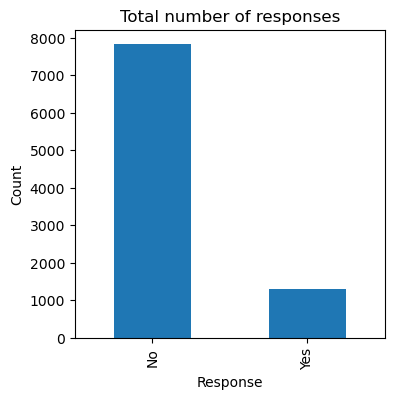

In [6]:
# Show a plot of the total number of responses.
total_resp = df["response"].value_counts()
total_resp.plot.bar(figsize=(4,4))

plt.xlabel("Response")
plt.ylabel("Count")
plt.title("Total number of responses")
#plt.show()

<AxesSubplot:title={'center':'Total number of responses'}>

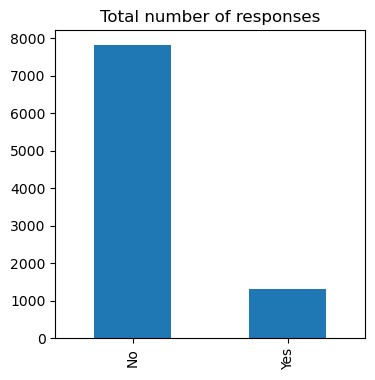

In [7]:
# Show a plot of the total number of responses.
# The shortest line
df["response"].value_counts().plot.bar(x="Response", y="Count", title="Total number of responses", figsize=(4,4))


In [8]:
# to understand data
df2 = df.groupby(['sales_channel','response']).size()
df2

sales_channel  response
Agent          No          2811
               Yes          666
Branch         No          2273
               Yes          294
Call Center    No          1573
               Yes          192
Web            No          1169
               Yes          156
dtype: int64

In [9]:
df2 = df2.unstack()
df2

response,No,Yes
sales_channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


In [10]:
# or instead of using groupby().size()
# we can do the same using --> value_counts()

df[["sales_channel", "response"]].value_counts().unstack()


response,No,Yes
sales_channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


In [11]:
# create new dataframe from "sales_channel", "response"
df_sales_resp = df[["sales_channel", "response"]]
df_sales_resp
# df2 = df.groupby(['sales_channel','response']).size()

,sales_channel,response
0,Agent,No
1,Agent,No
2,Agent,No
3,Call Center,No
4,Agent,No
...,...,...
9129,Web,No
9130,Branch,Yes
9131,Branch,No
9132,Branch,No


In [12]:
df_sales_resp = df_sales_resp.pivot(columns='response')
df_sales_resp

sales_channel        
response            No     Yes
0                Agent     NaN
1                Agent     NaN
2                Agent     NaN
3          Call Center     NaN
4                Agent     NaN
...                ...     ...
9129               Web     NaN
9130               NaN  Branch
9131            Branch     NaN
9132            Branch     NaN
9133       Call Center     NaN

[9134 rows x 2 columns]

In [13]:
sales_resp_no = df_sales_resp["sales_channel", "No"].value_counts()
sales_resp_yes = df_sales_resp["sales_channel", "Yes"].value_counts()

In [14]:
# calculate response rate

sales_resp_result = sales_resp_yes/(sales_resp_yes + sales_resp_no)*100
sales_resp_result

Agent          19.154443
Branch         11.453058
Call Center    10.878187
Web            11.773585
dtype: float64

In [15]:
sale_resp_rate_list = list()
for j in range(len(sales_resp_result)):
    sale_resp_rate_list.append(sales_resp_result[j])

sale_resp_rate_list
    

[19.15444348576359, 11.453058044409817, 10.878186968838527, 11.773584905660377]

In [16]:
df_sales_resp_rate = {"sales_channel": ['Agent', 'Branch', 'Call Center', 'Web'],
                       "sale_resp_rate": sale_resp_rate_list}
sales_resp_rate_table = pd.DataFrame(df_sales_resp_rate).round(2)
sales_resp_rate_table

,sales_channel,sale_resp_rate
0,Agent,19.15
1,Branch,11.45
2,Call Center,10.88
3,Web,11.77


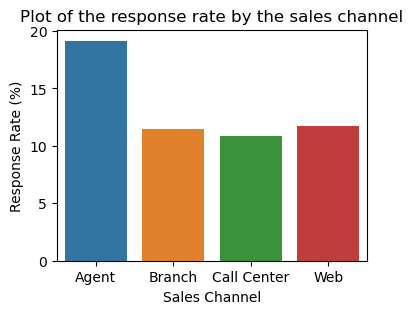

In [17]:
plt.figure(figsize=(4,3))
sns.barplot(x="sales_channel", y="sale_resp_rate", data=sales_resp_rate_table)
plt.xlabel("Sales Channel")
plt.ylabel("Response Rate (%)")
plt.title("Plot of the response rate by the sales channel")
plt.show()

## Show a plot of the response rate by the total claim amount.

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64
MEDIAN 383.94543350000004
MODE 0    316.8
Name: total_claim_amount, dtype: float64


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

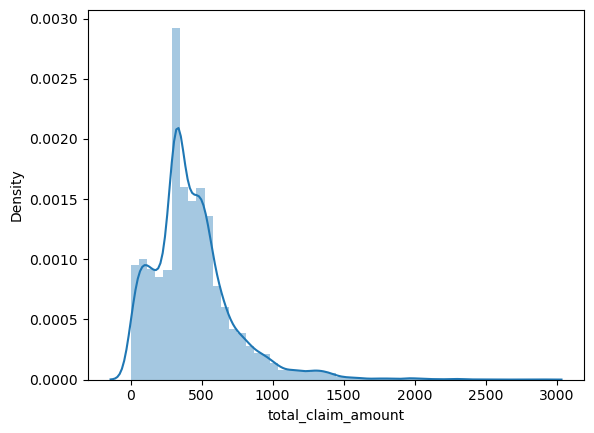

In [18]:
# check data distribution

print(df['total_claim_amount'].describe())
print("MEDIAN", df['total_claim_amount'].median())
print("MODE", df['total_claim_amount'].mode())


sns.distplot(df['total_claim_amount'])

In [19]:
# create a proper range to calculate a "response rate" of each range
# I chose to part them base on quartile range

# use qcut() to create 4 groups of data (Q1 -Q4)
pd.qcut(df['total_claim_amount'], q=4)

0       (383.945, 547.515]
1       (547.515, 2893.24]
2       (547.515, 2893.24]
3       (383.945, 547.515]
4         (0.098, 272.258]
               ...        
9129      (0.098, 272.258]
9130    (272.258, 383.945]
9131    (547.515, 2893.24]
9132    (547.515, 2893.24]
9133    (272.258, 383.945]
Name: total_claim_amount, Length: 9134, dtype: category
Categories (4, interval[float64, right]): [(0.098, 272.258] < (272.258, 383.945] < (383.945, 547.515] < (547.515, 2893.24]]

In [20]:
# store the bin results back in the original dataframe for future analysis. 
# For this example, create 4 bins (4 quartiles) 

# create a new column 'total_claim_amount_quartile' & store data in this column & give a value of 'Q1', 'Q2', 'Q3', 'Q4'
df['total_claim_amount_quartile'] = pd.qcut(df['total_claim_amount'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

df[['total_claim_amount', 'total_claim_amount_quartile']]


,total_claim_amount,total_claim_amount_quartile
0,384.811147,Q3
1,1131.464935,Q4
2,566.472247,Q4
3,529.881344,Q3
4,138.130879,Q1
...,...,...
9129,198.234764,Q1
9130,379.200000,Q2
9131,790.784983,Q4
9132,691.200000,Q4


In [21]:
# have a new data frame to work on it
df_claim_resp = df[['total_claim_amount', 'total_claim_amount_quartile','response']]

In [22]:
df_claim_resp.groupby(['total_claim_amount_quartile','response']).size().unstack()

response,No,Yes
total_claim_amount_quartile,,
Q1,2074,210
Q2,1911,372
Q3,1875,408
Q4,1966,318


In [23]:
df_claim_resp_table = df_claim_resp.groupby(['total_claim_amount_quartile','response']).size().unstack()
df_claim_resp_table

response,No,Yes
total_claim_amount_quartile,,
Q1,2074,210
Q2,1911,372
Q3,1875,408
Q4,1966,318


In [24]:
claim_resp_result = df_claim_resp_table["Yes"]/(df_claim_resp_table.sum(axis=1))*100

In [25]:
claim_resp_list = list()
for k in range(len(claim_resp_result)):
    claim_resp_list.append(claim_resp_result[k])

claim_resp_list

[9.194395796847637, 16.29434954007884, 17.871222076215506, 13.922942206654993]

In [26]:
df_claim_resp_rate = {"total_claim_amount_quartile": ['Q1', 'Q2', 'Q3', 'Q4'],
                       "claim_resp_rate": claim_resp_list}
claim_resp_rate_table = pd.DataFrame(df_claim_resp_rate).round(2)
claim_resp_rate_table

,total_claim_amount_quartile,claim_resp_rate
0,Q1,9.19
1,Q2,16.29
2,Q3,17.87
3,Q4,13.92


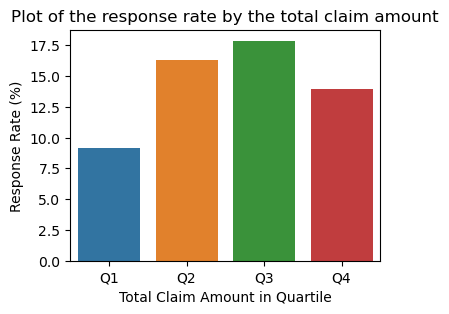

In [27]:
plt.figure(figsize=(4,3))
sns.barplot(x="total_claim_amount_quartile", y="claim_resp_rate", data=claim_resp_rate_table)
plt.xlabel("Total Claim Amount in Quartile")
plt.ylabel("Response Rate (%)")
plt.title("Plot of the response rate by the total claim amount")
plt.show()

## Show a plot of the response rate by income

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64
MEDIAN 33889.5
MODE 0    0
Name: income, dtype: int64


<AxesSubplot:xlabel='income', ylabel='Density'>

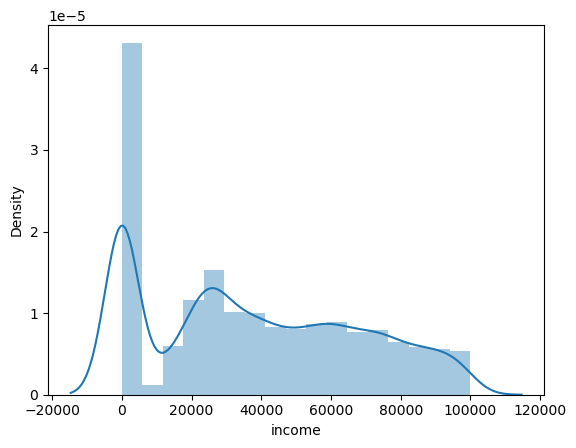

In [28]:
# check data distribution of "income"

print(df['income'].describe())
print("MEDIAN", df['income'].median())
print("MODE", df['income'].mode())

sns.distplot(df['income'])

In [29]:
# Not normal distribution
# Where min=0, max=100000, maybe we can part it into 3 groups: low, middle, high income?

# create a new column 'total_claim_amount_quartile' & store data in this column & give a value of 'Q1', 'Q2', 'Q3', 'Q4'
df['income_group'] = pd.cut(df['income'], bins=3, labels=['low', 'middle', 'high'])
df[['income', 'income_group']]

,income,income_group
0,56274,middle
1,0,low
2,48767,middle
3,0,low
4,43836,middle
...,...,...
9129,71941,high
9130,21604,low
9131,0,low
9132,21941,low


In [30]:
df_income = df[['income', 'income_group', 'response']] 
df_income = df_income.groupby(['income_group','response']).size() 

In [31]:
df_income = df_income.unstack()
df_income

response,No,Yes
income_group,,
low,3850,660
middle,2269,384
high,1707,264


In [32]:
income_resp = df_income["Yes"]/(df_income.sum(axis=1))*100
income_resp

income_group
low       14.634146
middle    14.474180
high      13.394216
dtype: float64

In [33]:
income_resp_rate = list()
for n in range(len(income_resp)):
    income_resp_rate.append(income_resp[n])
income_resp_rate 

[14.634146341463413, 14.474180173388618, 13.39421613394216]

In [34]:
df_income_resp_rate = {"income_group": ['low', 'middle', 'high'],
                       "income_resp_rate": income_resp_rate}
income_resp_rate_table = pd.DataFrame(df_income_resp_rate).round(2)
income_resp_rate_table

,income_group,income_resp_rate
0,low,14.63
1,middle,14.47
2,high,13.39


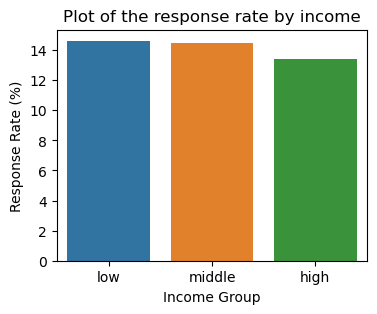

In [35]:
plt.figure(figsize=(4,3))
sns.barplot(x="income_group", y="income_resp_rate", data=income_resp_rate_table)
plt.xlabel("Income Group")
plt.ylabel("Response Rate (%)")
plt.title("Plot of the response rate by income")
plt.show()

In [36]:
# I want to look at the group of "no income"
df_income_zero = df[df['income'] == 0]

In [37]:
df_income_zero['response'].value_counts()

No     2119
Yes     198
Name: response, dtype: int64

In [38]:
# we can see that the response rate of "no income group" is lower than average response rate
income_zero_resp_rate = df_income_zero['response'].value_counts()["Yes"]/df_income_zero['response'].value_counts().sum()*100
income_zero_resp_rate



8.54553301683211

# Final plot of the response rate by income

In [39]:
# So I decided to separate this into a separate group & do the rest into 3 groups

# select income > 0
df_income_earn_group = df[df['income'] > 0]

# divide into 3 groups
df_income_earn_group['income_group_new'] = pd.cut(df_income_earn_group['income'], bins=3, labels=['low', 'middle', 'high'])

df_income_earn_group = df_income_earn_group[['income_group', 'response']]


df_income_earn_group = df_income_earn_group.groupby(['income_group', 'response']).size()


In [40]:
df_income_earn_group = df_income_earn_group.unstack()
df_income_earn_group

response,No,Yes
income_group,,
low,1731,462
middle,2269,384
high,1707,264


In [41]:
# calculate the response rate by income
earn_group_resp_rate_result = df_income_earn_group["Yes"]/(df_income_earn_group.sum(axis=1))*100 


# put the result into a list
earn_group_resp_rate = list()
for m in range(len(earn_group_resp_rate_result)):
    earn_group_resp_rate.append(earn_group_resp_rate_result[m])
earn_group_resp_rate 


[21.06703146374829, 14.474180173388618, 13.39421613394216]

In [42]:
# add the response rate of 'no income group' into the same 'response rate by income' list (as a new list name 'new_income_group_resp_rate')

new_income_group_resp_rate = earn_group_resp_rate
new_income_group_resp_rate.insert(0, income_zero_resp_rate)
new_income_group_resp_rate


[8.54553301683211, 21.06703146374829, 14.474180173388618, 13.39421613394216]

In [43]:
# create a new data frame 

df_earn_group = {"income_group": ['no_earning', 'low', 'middle', 'high'],
                       "income_resp_rate": new_income_group_resp_rate}
new_income_group_resp_table = pd.DataFrame(df_earn_group).round(2)
new_income_group_resp_table

,income_group,income_resp_rate
0,no_earning,8.55
1,low,21.07
2,middle,14.47
3,high,13.39


Text(0.5, 1.0, 'Plot of the response rate by income')

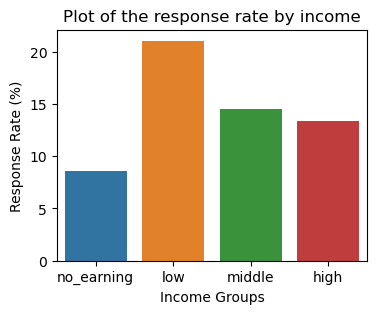

In [44]:
# do the final plot 

plt.figure(figsize=(4,3))
sns.barplot(x="income_group", y="income_resp_rate", data = new_income_group_resp_table)
plt.xlabel("Income Groups")
plt.ylabel("Response Rate (%)")
plt.title("Plot of the response rate by income")

# Lab | Customer Analysis Round 4

In [45]:
# create new data frame for round 4
df4 = df.drop(["total_claim_amount_quartile", "income_group" ], axis=1)

In [46]:
# Check the data types of the columns. 
# Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)


df4.dtypes # check data types of the columns

numerical = df4.select_dtypes(include="number") # Get the numeric data into dataframe called numerical 

categoricals = df4.select_dtypes(include="object")  # Get the categorical columns in a dataframe called categoricals



In [47]:
df_num = numerical # assign it to df_num for short/simple data frame name

### Now we will try to check the normality of the numerical variables visually


#### Use seaborn library to construct distribution plots for the numerical variables


In [48]:


enumerate(numerical, start = 1) # enumerate adds a counter to an iterable and returns in it as the enumerate object
                                    # this case it takes columns + gives order, returns into tuples
a = list(enumerate(numerical, start = 1)) # in order to use it multiple time, I put it into a object (as a list)
                                          # in gerneral enumerate object can be travered only once


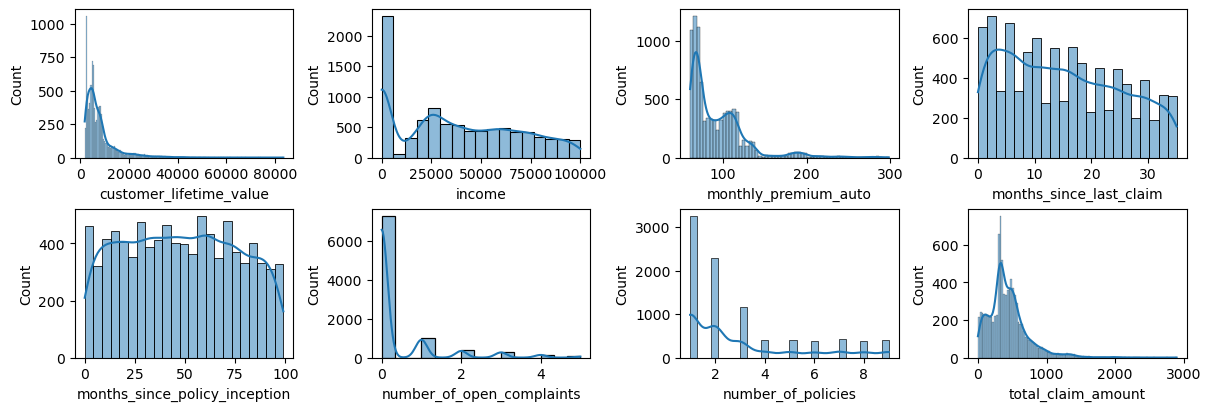

In [49]:

plt.figure(figsize = (12, 4), constrained_layout = True)

for i in a:
    plt.subplot(2, 4, i[0]) # create multi-plot, using subplot, 2 rows, 4 cols, sequence of plot (iterate through a)
    sns.histplot(data = df_num, x = i[1], kde=True)
    
    

#### Use Matplotlib to construct histograms

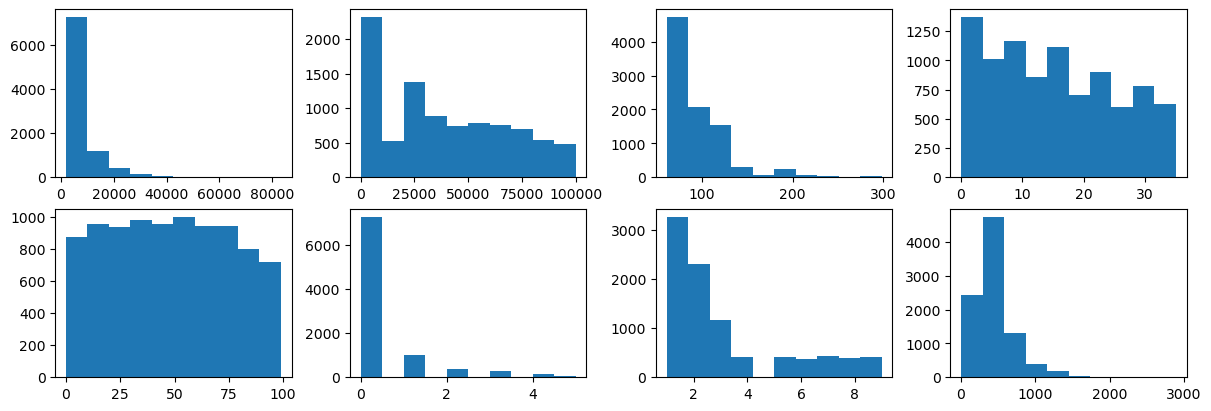

In [50]:
plt.figure(figsize = (12, 4), constrained_layout = True)

for i in a:
    plt.subplot(2, 4, i[0]) # create multi-plot, using subplot, 2 rows, 4 cols, sequence of plot (iterate through a)
    plt.hist(data = df_num, x = i[1])
    

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

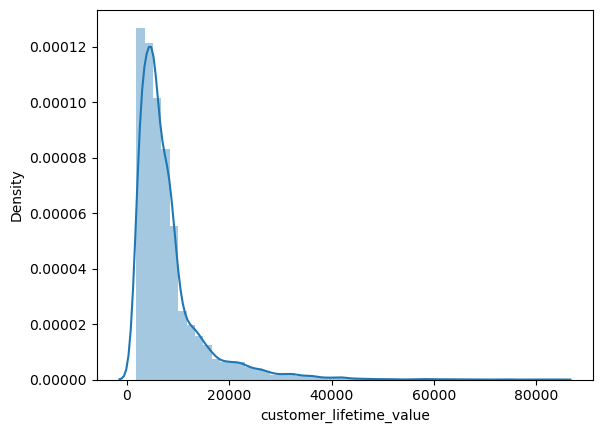

In [82]:
# Do the distributions for different numerical variables look like a normal distribution

# answer: none of them look like normal distribution

# maybe closer to normal distribution are "customer_lifetime_value", "total_claim_amount", "monthly_premium_auto"

sns.distplot(df_num["customer_lifetime_value"])


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

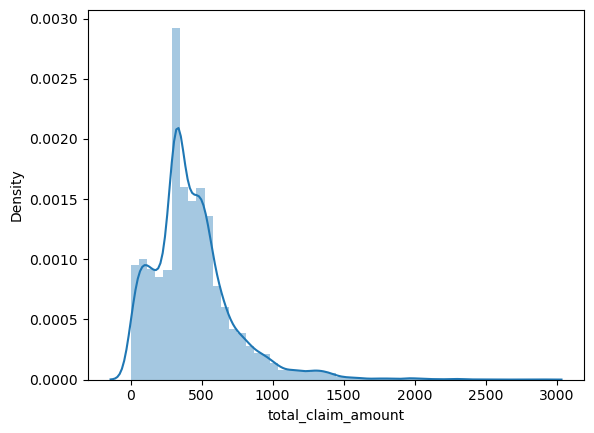

In [84]:
sns.distplot(df_num["total_claim_amount"])


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

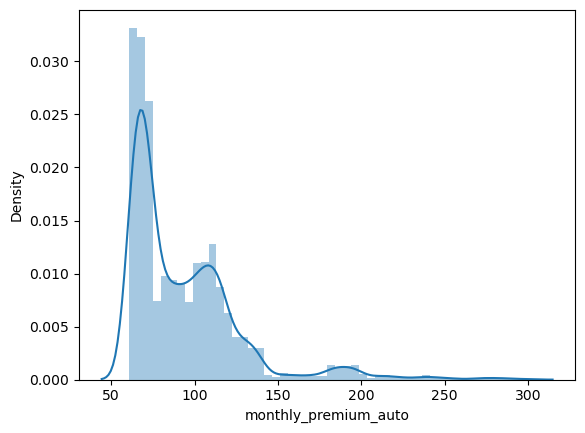

In [83]:
sns.distplot(df_num["monthly_premium_auto"])

In [52]:
# For the numerical variables, check the multicollinearity between the features. 
# Please note that we will use the column total_claim_amount later as the target variable.

# First, look at correlations between columns
# because 1) we don't want multicollinearity, 2) we want high correlation with the 'target'

data_corr = df_num.corr()
data_corr = round(data_corr,2)
data_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


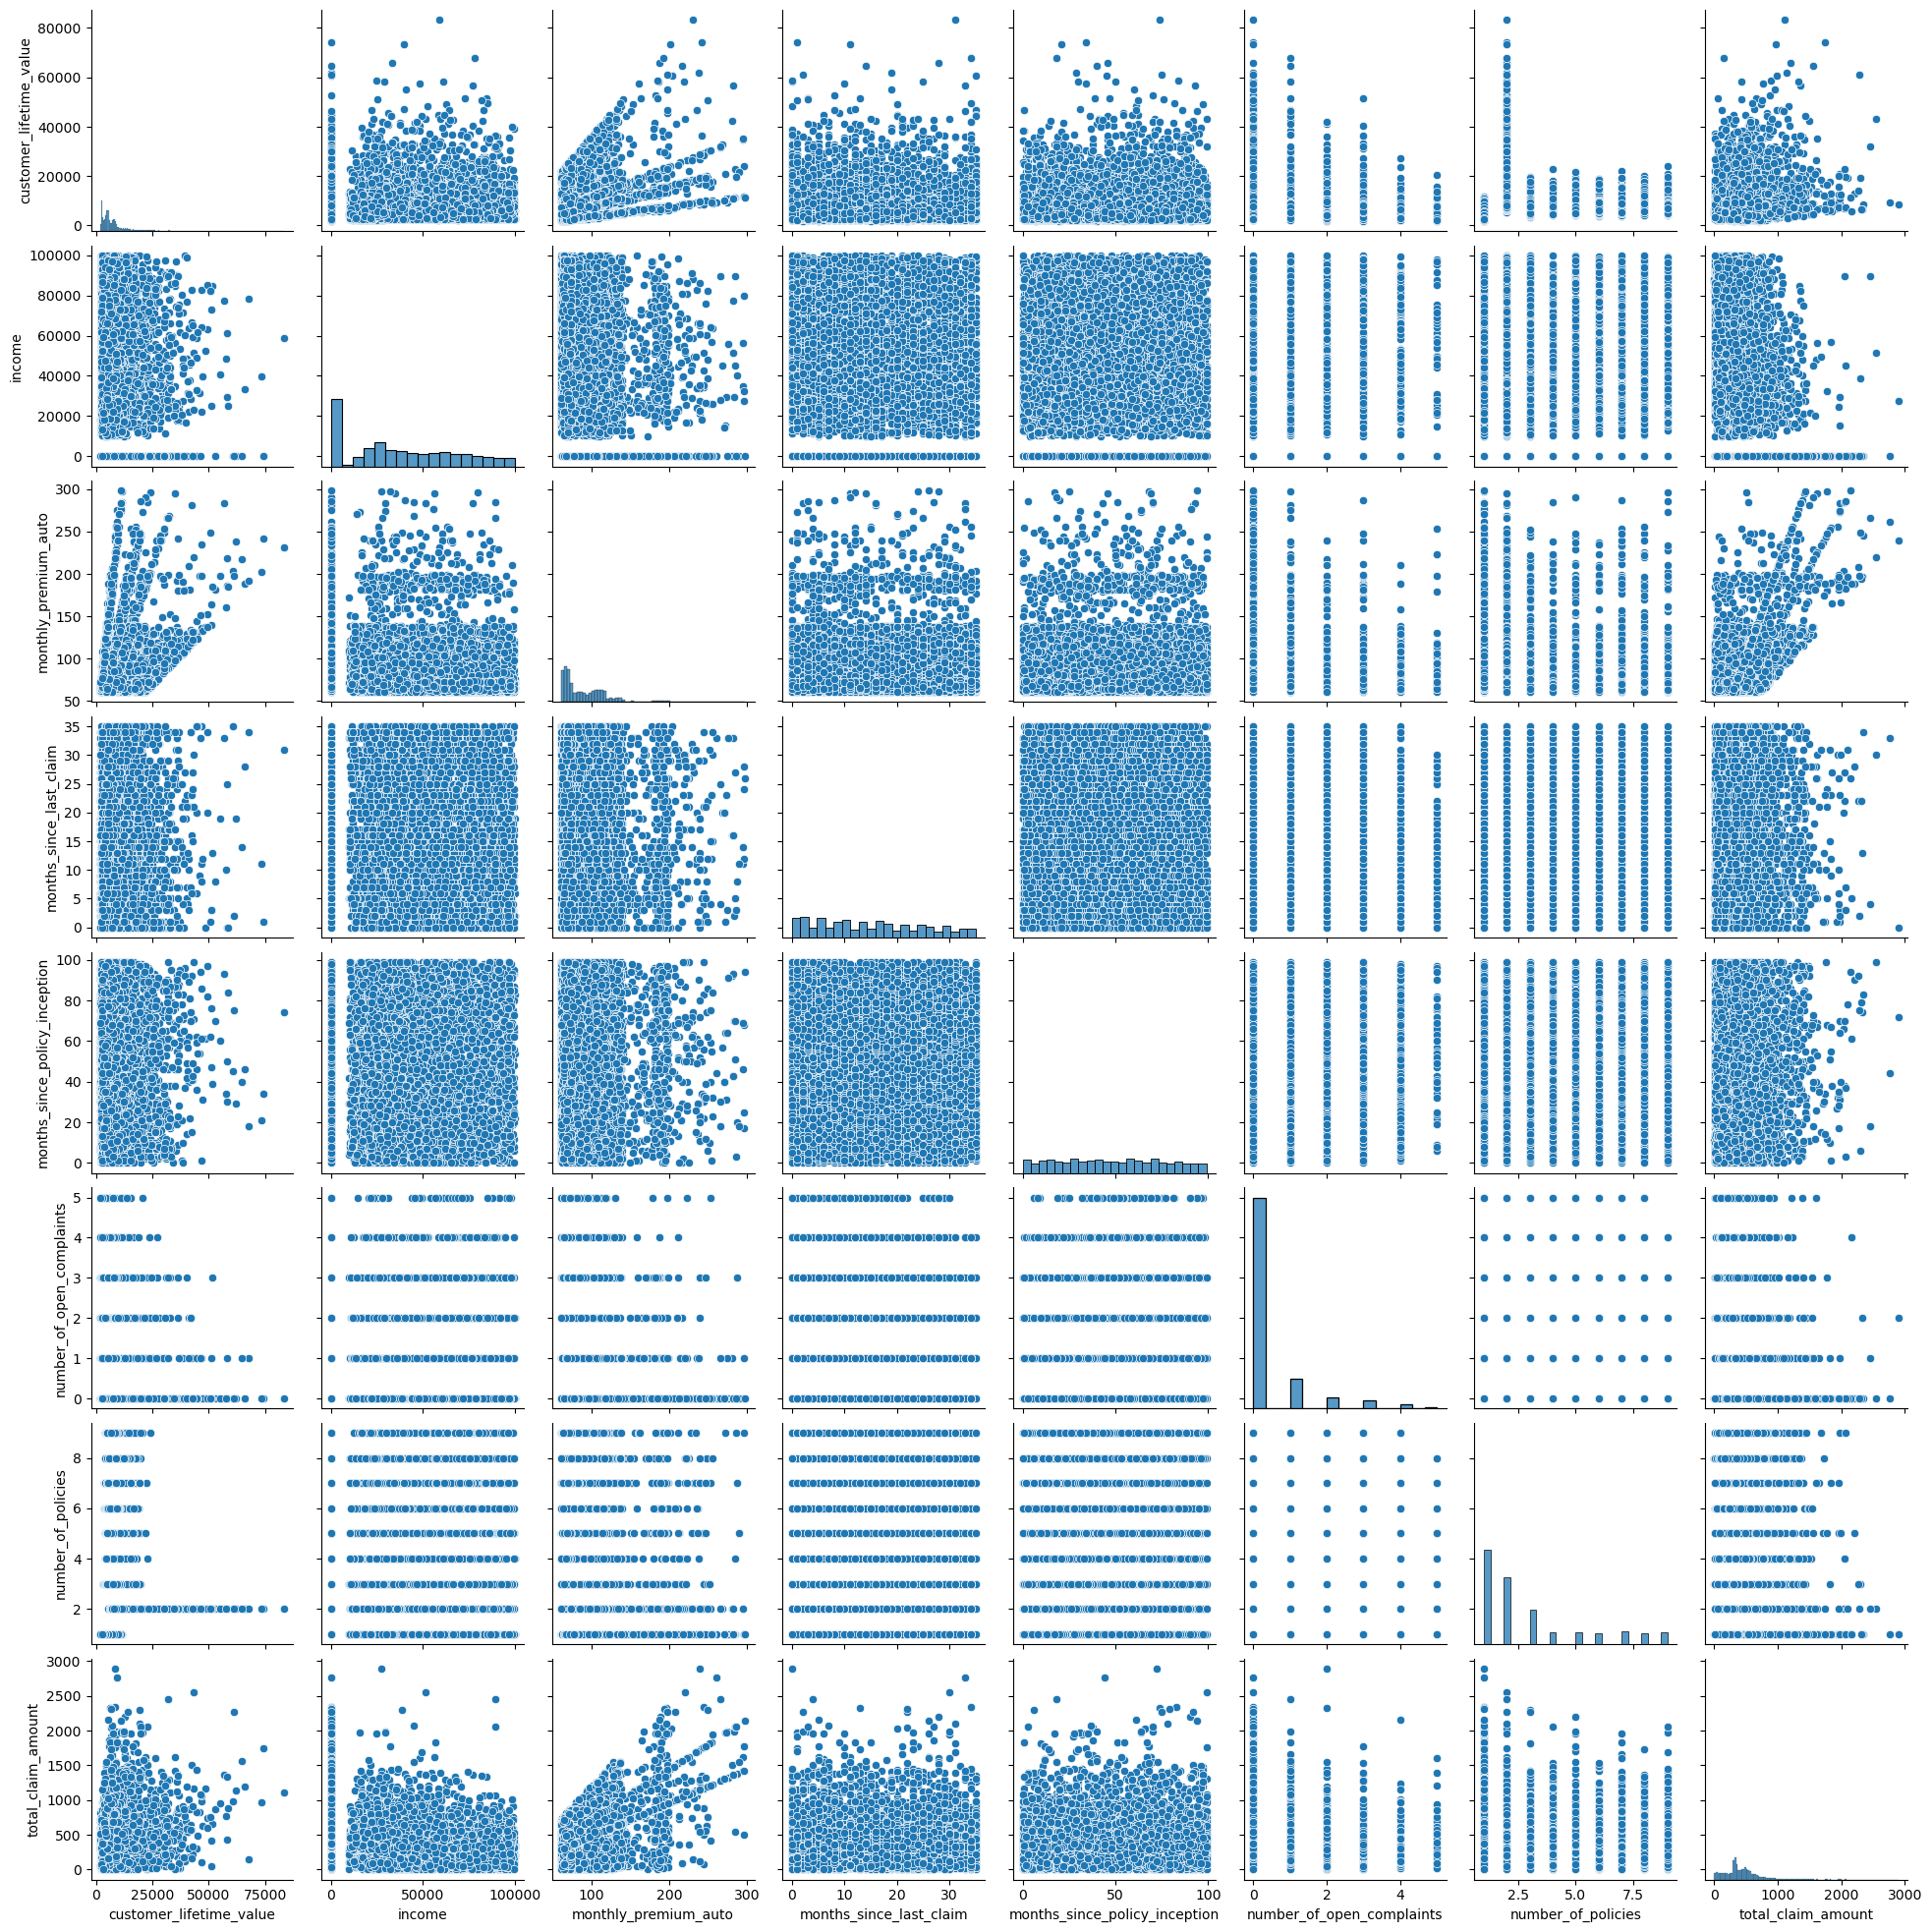

In [53]:
# or use pairplot() to visualize them

sns.pairplot(df_num)

In [77]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). 
# Write code for both the correlation matrix and for seaborn heatmap. 
# If there is no pair of features that have a high correlation, then do not drop any features

data_corr = df_num.corr()
correlations_matrix = round(data_corr,2)


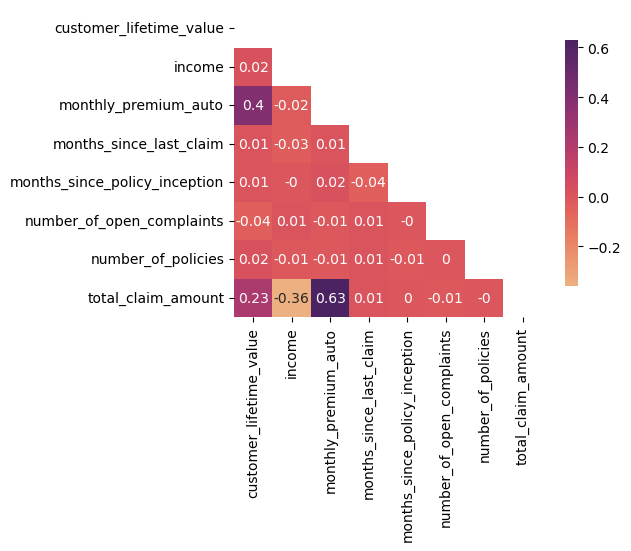

In [78]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, square=True, cbar_kws={"shrink":.8}, cmap='flare')


# Lab | Customer Analysis Round 5

## Processing Data

(Further processing...)



### X-y split.


In [56]:
y = df_num['total_claim_amount']
x = df_num.drop(['total_claim_amount'], axis=1) 
x.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


### Normalize (numerical).

In [57]:
from sklearn.preprocessing import MinMaxScaler

# normalize data (rescale) into (0,1)
transformer = MinMaxScaler().fit(x) ### USE MINMAX FOR NORMALIZING
x_minmax = transformer.transform(x) #This is a an array of arrays
x_minmax.shape

(9134, 7)

In [58]:
# create new data frame using data from 'x_minmax'
x_norm = pd.DataFrame(x_minmax, columns = x.columns)
x_norm.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


In [59]:
# visualize them using distribution plot

enum_x = list(enumerate(x_norm, start = 1)) # enumerate adds a counter to an iterable and returns in it as the enumerate objec
                                            # put the enumerate objec into another object (as a list), to be able to reuse again
                                          

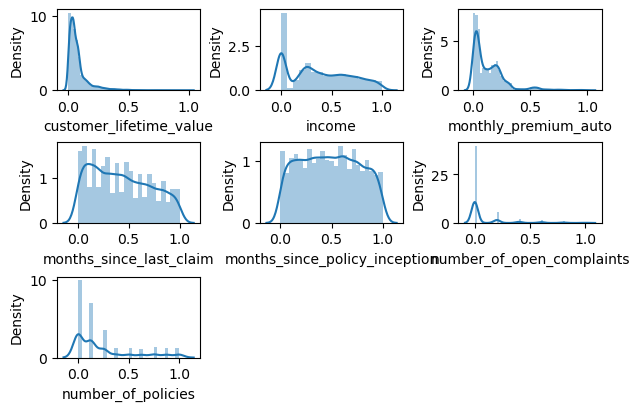

In [60]:
plt.figure(figsize = (6, 4), constrained_layout = True)

for i in enum_x:
    plt.subplot(3, 3, i[0]) # create multi-plot, using subplot, 3 rows, 3 cols, sequence of plot (iterate through enum_x)
    sns.distplot(x_norm[(i[1])])
    
    

<AxesSubplot:xlabel='income', ylabel='Density'>

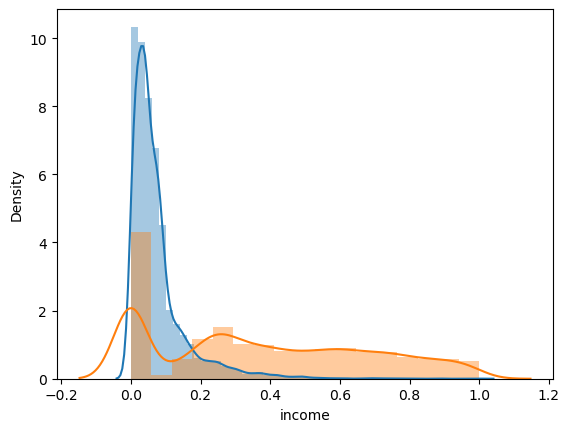

In [66]:
# column "customer_lifetime_value" look a little bit more like normal distribution
# let's take a closer look

sns.distplot(x_norm["customer_lifetime_value"])

# also, take a look at "income", 
# if we remove 'no income (income = 0)', this could look like normal distribution but that makes no sense
# because removing 'no income group' is delete big part of the data & could affect the model

sns.distplot(x_norm["income"])


<AxesSubplot:xlabel='customer_lifetime_value'>

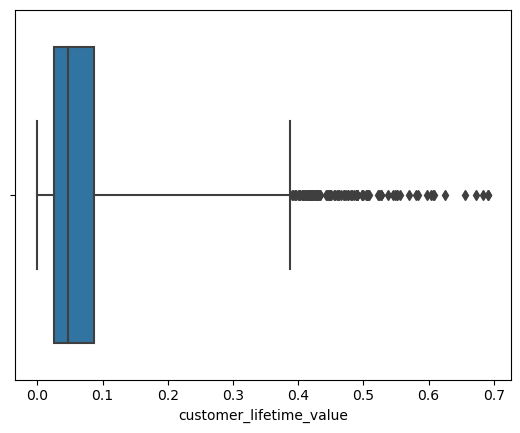

In [74]:
# visualize outliers
sns.boxplot(x_norm["customer_lifetime_value"], whis=5)

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

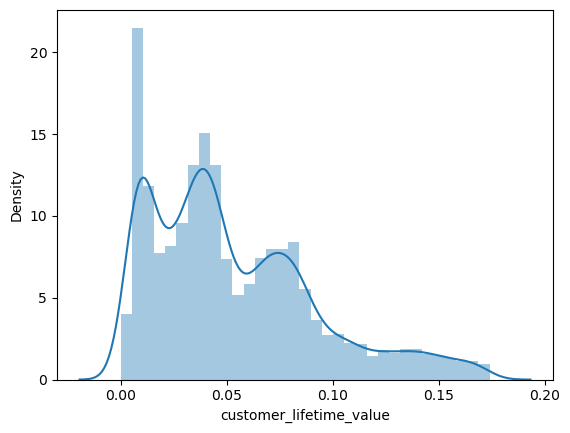

In [76]:
iqr = np.percentile(x_norm["customer_lifetime_value"],75) - np.percentile(x_norm["customer_lifetime_value"],25) 

# define the limits
upper_limit = np.percentile(x_norm["customer_lifetime_value"],75) + 1.5*iqr
lower_limit = np.percentile(x_norm["customer_lifetime_value"],25) - 1.5*iqr


# remove outliers from the data
x_norm = x_norm[(x_norm["customer_lifetime_value"]>lower_limit) & (x_norm["customer_lifetime_value"]<upper_limit)]

sns.distplot(x_norm["customer_lifetime_value"])
